In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# polinomial regression

In [3]:
df = pd.read_csv("Position_Salaries.csv")

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [149]:
X = df.iloc[: , 1:-1]
y = df.iloc[:, 2]

do not need to split data because we want as accurate a model as possible. need to fuel the model with as much data as we can

In [160]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X, y)

In [163]:
from sklearn.preprocessing import PolynomialFeatures

try various degress, tends to fit data better as degree increases

In [164]:
poly_featuress = PolynomialFeatures(degree = 4)
X_poly = poly_featuress.fit_transform(X)
poly_reg_model = LinearRegression().fit(X_poly, y)

In [165]:
y_pred = poly_reg_model.predict(X_poly)

attempting to determine if new hire is bluffing or not for their prospective salary

Text(0,0.5,'salary')

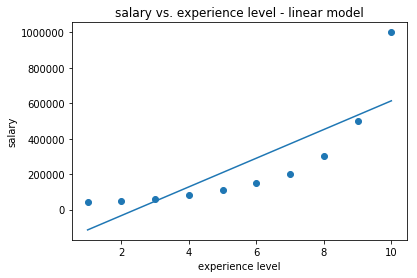

In [166]:
y_lin_pred = lin_reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_lin_pred)
plt.title('salary vs. experience level - linear model')
plt.xlabel('experience level')
plt.ylabel('salary')

Text(0,0.5,'salary')

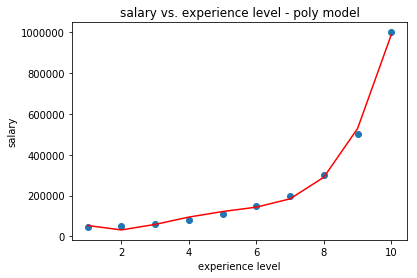

In [167]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('salary vs. experience level - poly model')
plt.xlabel('experience level')
plt.ylabel('salary')

In [177]:
np.amin(X)

Level    1
dtype: int64

In [178]:
X_grid = np.arange(int(np.amin(X)), int(np.amax(X)), .1)
X_grid = X_grid.reshape((len(X_grid), 1))

# more granular predictions

Text(0,0.5,'salary')

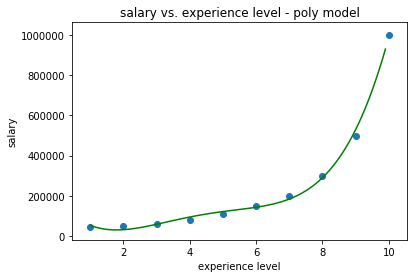

In [197]:
y_pred_grid = poly_reg_model.predict(PolynomialFeatures(degree=4).fit_transform(X_grid))
plt.plot(X_grid, y_pred_grid, color= 'green')
plt.scatter(X, y)
#plt.plot(X, y_pred, color='yellow')
plt.title('salary vs. experience level - poly model')
plt.xlabel('experience level')
plt.ylabel('salary')

predicting new result using linear regression

In [203]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X, y)
lin_reg.predict([[6.5]])

array([330378.78787879])

In [205]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_poly, y)
lin_reg.predict(PolynomialFeatures(degree = 4).fit_transform([[6.5]]))

array([158862.45265152])

Text(0,0.5,'salary')

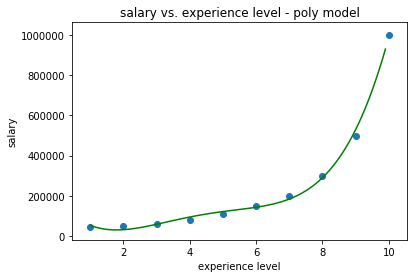

In [206]:
y_pred_grid = poly_reg_model.predict(PolynomialFeatures(degree=4).fit_transform(X_grid))
plt.plot(X_grid, y_pred_grid, color= 'green')
plt.scatter(X, y)
#plt.plot(X, y_pred, color='yellow')
plt.title('salary vs. experience level - poly model')
plt.xlabel('experience level')
plt.ylabel('salary')

In [208]:
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
